# Implémentation d'un SVM à noyau RBF (courbes) sur les données de la base IRIS

## Importation des bibliothèques nécessaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Chargement et préparation des données
### Chargement de la base de données Iris

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # On prend seulement les deux premières caractéristiques pour la visualisation
y = iris.target

## Normalisation des données

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Séparation des données en train/test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Entraînement du modèle SVM avec un noyau RBF

In [16]:
svm = SVC(kernel='rbf', C=15, gamma=1.5)
svm.fit(X_train, y_train)

SVC(C=15, gamma=1.5)

## Les paramètres :

- `kernel='rbf'` : Utilisation du noyau RBF pour séparer les catégories avec des courbes (countrairement à un nouyau linéaire qui séparerait avec des droites).
- `C` : C représente l'équilibre d'apprentissage du modèle, plus il est grand plus le modèle va apprendre et sera précis (mais il peut aussi surraprendre), si il est plus petit il laissera place à une plus grande marge.
- `gamma=1` : Le paramètre gamma va déterminer si les exemples d'entraînement fournis au model influencent plus ou moins les résultats.

## Prédictions et évaluation des prédictions

In [17]:
# Prédictions
y_pred = svm.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

## Affichage des résultats

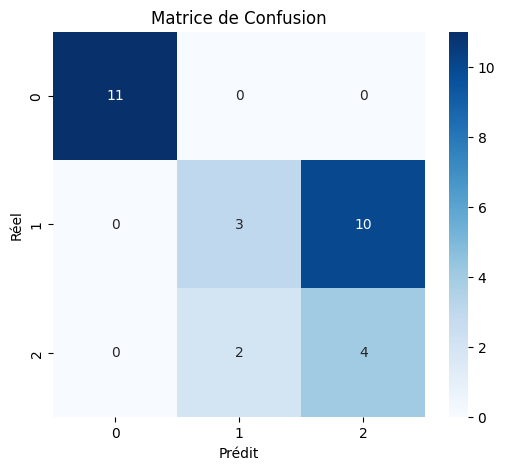

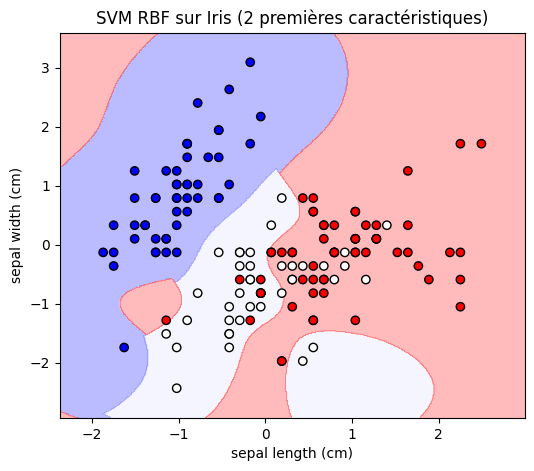

In [18]:
def afficher_matrice_confusion(cm, labels):
    """Affiche la matrice de confusion."""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.title('Matrice de Confusion')
    plt.show()

def afficher_frontiere_decision(X, y, model, feature_names):
    """Affiche la frontière de décision."""
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("SVM RBF sur Iris (2 premières caractéristiques)")
    plt.show()

# Affichage séparé des résultats
afficher_matrice_confusion(cm, np.unique(y))
afficher_frontiere_decision(X, y, svm, iris.feature_names)

## Analyse des résultats :

### Matrice de confusion : 
La matrice de confusion permet de visualiser les performances du modèle en termes de vrais positifs, faux positifs, vrais négatifs et faux négatifs.

### Frontière de décision : 
La frontière de décision montre comment le modèle sépare les différentes classes en fonction des deux premières caractéristiques de l'ensemble de données Iris.